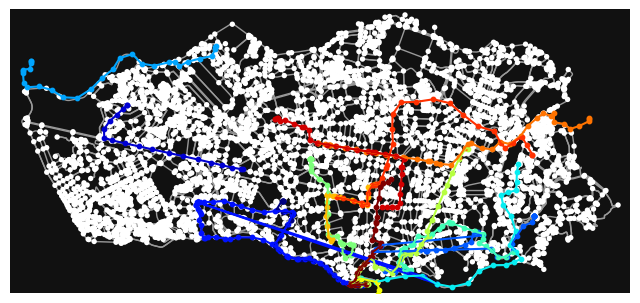

In [4]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
import ast  
import numpy as np

grap_path = "../data/map/porto.graphml"

G = ox.io.load_graphml(filepath=grap_path)

# read the train_1500 csv file
csv_path = "../data/trajectory/train_1500.csv" 
df = pd.read_csv(csv_path).head(15)

colors = plt.cm.jet(np.linspace(0, 1, 15))  # 生成一个颜色映射

fig, ax = ox.plot_graph(G, show=False, close=False)
for idx, row in df.iterrows():
    polyline_str = row['POLYLINE']
    # 将POLYLINE字段从字符串解析为列表
    polyline = ast.literal_eval(polyline_str)
    if polyline:  # 检查列表是否为空
        lons, lats = zip(*polyline)  # 解压经度和纬度
        ax.scatter(lons, lats, c=[colors[idx]], s=10, label=f'Row {idx+1}')
        ax.plot(lons, lats, color=colors[idx])

plt.show()
